In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import datetime
from scipy.stats import chi2_contingency
import scipy.stats as stats


In [285]:
casesdf= pd.read_csv('covid_confirmed_usafacts (1).csv')
deathsdf=pd.read_csv('covid_deaths_usafacts.csv')
Florida_cases= casesdf[casesdf['State']=='FL']
Florida_deaths= deathsdf[deathsdf['State']=='FL']

Deaths in timeframe

In [286]:
start_date = '2020-06-01'
end_date = '2021-01-10'
filtered_columns = [col for col in Florida_deaths.columns if start_date <= col <= end_date]
filtered_columns = ['State']+['County Name'] + filtered_columns

filtered_deaths = Florida_deaths[filtered_columns]
filtered_deaths.head()



,State,County Name,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,...,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10
329,FL,Statewide Unallocated,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330,FL,Alachua County,7,7,8,8,8,8,8,8,...,129,133,133,136,136,136,136,137,138,139
331,FL,Baker County,3,3,4,4,4,4,4,4,...,36,36,36,36,36,37,38,38,38,38
332,FL,Bay County,3,3,3,4,4,4,4,4,...,209,212,213,213,214,214,219,223,227,227
333,FL,Bradford County,2,2,2,2,2,2,2,2,...,23,23,23,23,23,24,24,24,24,24


Cases in timeframe

In [287]:
filtered_columns2 = [col for col in Florida_cases.columns if start_date <= col <= end_date]
filtered_columns2 = ['State']+['County Name'] + filtered_columns2

filtered_cases = Florida_cases[filtered_columns2]
filtered_cases.head()

,State,County Name,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,...,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10
329,FL,Statewide Unallocated,84,87,89,90,95,97,97,93,...,3010,3045,3065,3078,3082,3156,3147,3157,3166,3170
330,FL,Alachua County,382,382,383,387,392,396,399,399,...,15866,16230,16335,16437,16585,16804,17000,17254,17430,17614
331,FL,Baker County,29,29,29,29,29,29,29,29,...,2470,2527,2544,2552,2580,2598,2625,2649,2666,2681
332,FL,Bay County,99,99,105,111,115,123,130,132,...,11907,12132,12261,12360,12471,12654,12839,12925,13123,13207
333,FL,Bradford County,51,51,51,51,52,52,52,52,...,2180,2224,2235,2247,2258,2276,2312,2357,2367,2380


Top 5 counties cases

In [288]:
filtered_cases_copy = filtered_cases.copy()

# Convert the date columns to numeric type
filtered_cases_copy.iloc[:, 2:] = filtered_cases_copy.iloc[:, 2:].apply(pd.to_numeric)

# Calculate the total number of cases for each county
filtered_cases_copy['Total Cases'] = filtered_cases_copy.iloc[:, 2:].sum(axis=1)

# Sort the DataFrame based on total cases in descending order
sorted_df = filtered_cases_copy.sort_values(by='Total Cases', ascending=False)

# Select the top 5 counties
top_5_county_cases = sorted_df.head(5)

print("Top 5 counties with the highest number of cases:")
print(top_5_county_cases[['State', 'County Name', 'Total Cases']])

Top 5 counties with the highest number of cases:
    State           County Name  Total Cases
372    FL    Miami-Dade County      35449912
335    FL       Broward County      16326620
379    FL    Palm Beach County      10009554
357    FL  Hillsborough County       8961980
377    FL        Orange County       8720103


Top 5 counties deaths

In [289]:
filtered_deaths_copy = filtered_deaths.copy()

# Convert the date columns to numeric type
filtered_deaths_copy.iloc[:, 2:] = filtered_deaths_copy.iloc[:, 2:].apply(pd.to_numeric)

# Calculate the total number of deaths for each county
filtered_deaths_copy['Total Deaths'] = filtered_deaths_copy.iloc[:, 2:].sum(axis=1)

# Sort the DataFrame based on total deaths in descending order
sorted_df = filtered_deaths_copy.sort_values(by='Total Deaths', ascending=False)

# Select the top 5 counties
top_5_county_deaths = sorted_df.head(5)

print("Top 5 counties with the highest number of deaths:")
print(top_5_county_deaths[['State', 'County Name', 'Total Deaths']])

Top 5 counties with the highest number of deaths:
    State           County Name  Total Deaths
372    FL    Miami-Dade County         602548
379    FL    Palm Beach County         270882
335    FL       Broward County         261843
381    FL      Pinellas County         142053
357    FL  Hillsborough County         132968


# Linear and Non-LinearRegression Models

In [290]:
X = np.arange(len(top_5_county_cases)).reshape(-1, 1)  # Number of days
y_cases = top_5_county_cases.iloc[:, 2:-1].values  # Cases data
y_deaths = top_5_county_deaths.iloc[:, 2:-1].values  # Deaths data

# Linear regression
model_cases_linear = LinearRegression()
model_deaths_linear = LinearRegression()

# Non-linear regression (polynomial with degree n)
degree = 2  # Example degree for polynomial regression
poly_features = PolynomialFeatures(degree=degree)


In [291]:
# Train models
model_cases_linear.fit(X, y_cases)
model_deaths_linear.fit(X, y_deaths)
X_poly = poly_features.fit_transform(X)
model_cases_poly = LinearRegression().fit(X_poly, y_cases)
model_deaths_poly = LinearRegression().fit(X_poly, y_deaths)

# Predictions
y_cases_pred_linear = model_cases_linear.predict(X)
y_deaths_pred_linear = model_deaths_linear.predict(X)
y_cases_pred_poly = model_cases_poly.predict(X_poly)
y_deaths_pred_poly = model_deaths_poly.predict(X_poly)

In [292]:
# Calculate RMSE
rmse_cases_linear = np.sqrt(mean_squared_error(y_cases, y_cases_pred_linear))
rmse_deaths_linear = np.sqrt(mean_squared_error(y_deaths, y_deaths_pred_linear))
rmse_cases_poly = np.sqrt(mean_squared_error(y_cases, y_cases_pred_poly))
rmse_deaths_poly = np.sqrt(mean_squared_error(y_deaths, y_deaths_pred_poly))



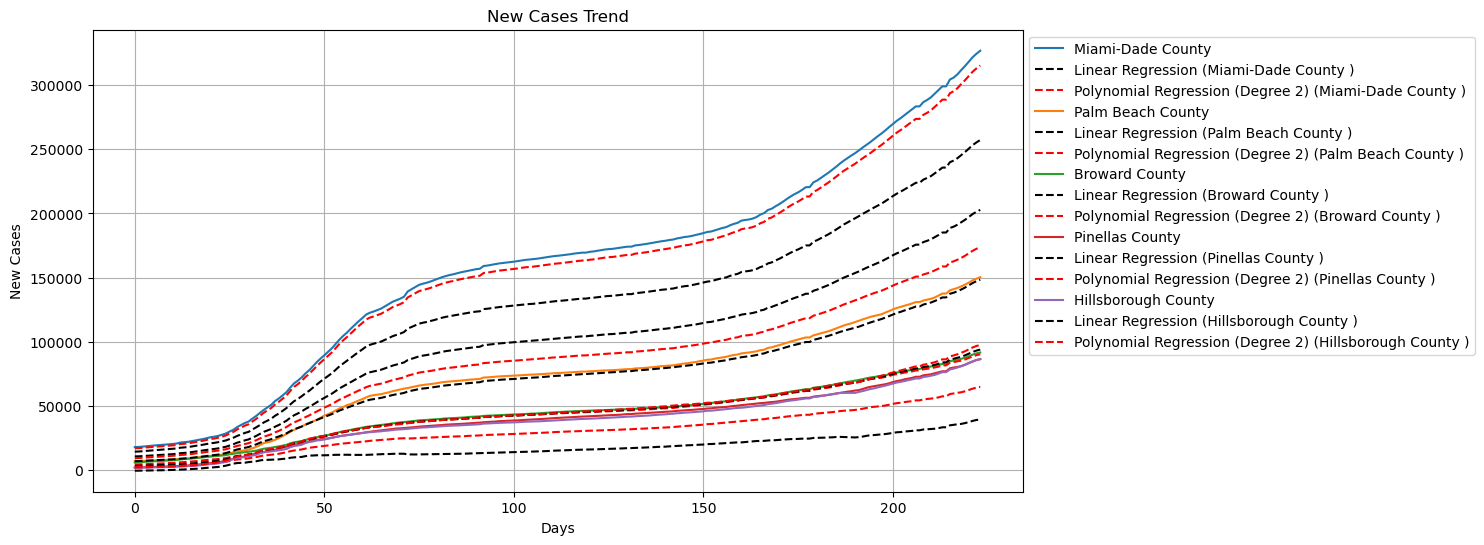

In [293]:
# Plotting for Cases
plt.figure(figsize=(12, 6))  # Set the figure size for the cases plot

for i in range(len(top_5_county_cases)):
    X = np.arange(len(y_cases[i])).reshape(-1, 1)
    plt.plot(X, y_cases[i], label=top_5_county_cases_names[i])
    plt.plot(X, y_cases_pred_linear[i], linestyle='--', color='black', label=f'Linear Regression ({top_5_county_cases_names[i]})')
    plt.plot(X, y_cases_pred_poly[i], linestyle='--', color='red', label=f'Polynomial Regression (Degree {degree}) ({top_5_county_cases_names[i]})')
plt.title('New Cases Trend')
plt.xlabel('Days')
plt.ylabel('New Cases')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

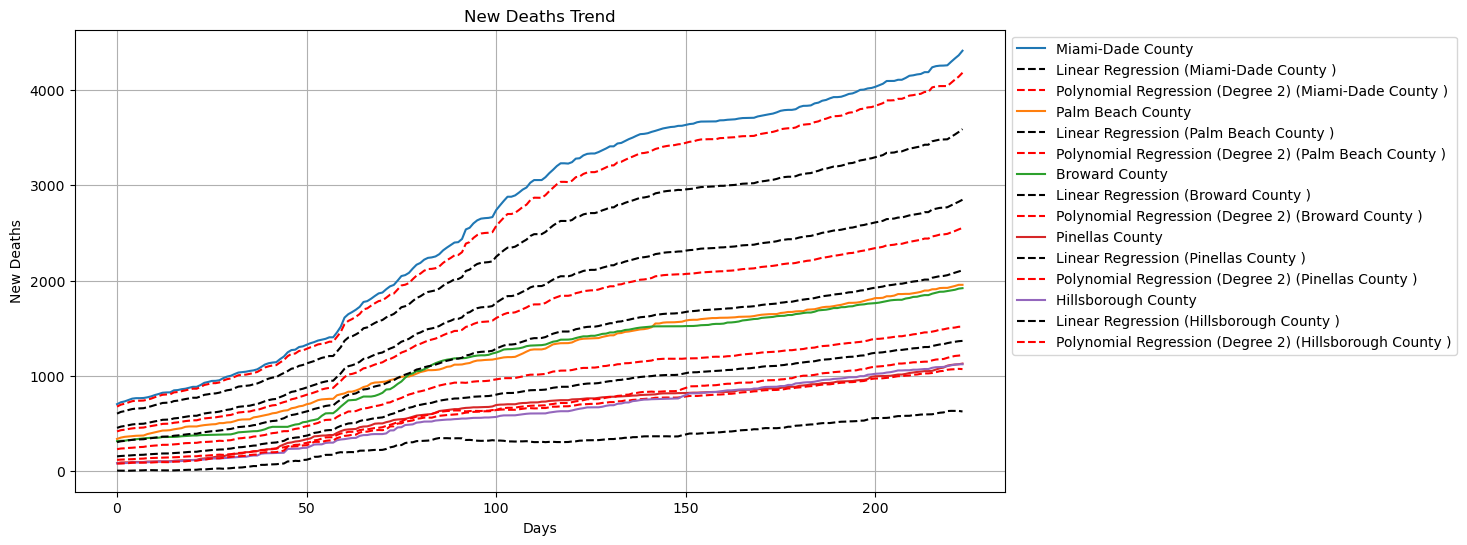

In [294]:
# Plotting for Deaths
plt.figure(figsize=(12, 6))  # Set the figure size for the deaths plot

for i in range(len(top_5_county_deaths)):
    X2 = np.arange(len(y_deaths[i])).reshape(-1, 1)
    plt.plot(X2, y_deaths[i], label=top_5_county_deaths_names[i])
    plt.plot(X2, y_deaths_pred_linear[i], linestyle='--', color='black', label=f'Linear Regression ({top_5_county_deaths_names[i]})')
    plt.plot(X2, y_deaths_pred_poly[i], linestyle='--', color='red', label=f'Polynomial Regression (Degree {degree}) ({top_5_county_deaths_names[i]})')
plt.title('New Deaths Trend')
plt.xlabel('Days')
plt.ylabel('New Deaths')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Calcluate error using RMSE

In [295]:
# Print RMSE
print(f"RMSE for linear regression (cases): {rmse_cases_linear}")
print(f"RMSE for linear regression (deaths): {rmse_deaths_linear}")
print(f"RMSE for polynomial regression (cases): {rmse_cases_poly}")
print(f"RMSE for polynomial regression (deaths): {rmse_deaths_poly}")

RMSE for linear regression (cases): 27318.523361039825
RMSE for linear regression (deaths): 395.1849186276145
RMSE for polynomial regression (cases): 8506.362826284685
RMSE for polynomial regression (deaths): 232.81020002288102


Miami-Dade, Broward and Palm Beach county are the 3 highest county cases. The trend contiusally increased and non of the counties have peaked out yet in our data range(2020-06-01-2021-01-10). The more time goes by, the more cases emerge.

In [296]:
top_5_county_cases['Has a city with top 5 population']= ['yes','yes','no','no','no']

,State,County Name,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,...,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,Total Cases,Has a city with top 5 population
372,FL,Miami-Dade County,18139,18224,18456,18779,19056,19299,19547,19756,...,305734,308259,311606,314742,318115,321555,324260,326607,35449912,yes
335,FL,Broward County,7196,7248,7339,7462,7572,7690,7804,7924,...,141010,141993,143186,144590,146201,147944,149168,150371,16326620,yes
379,FL,Palm Beach County,6135,6219,6477,6688,6859,7074,7230,7329,...,85479,86275,86839,87683,88852,90058,91049,91711,10009554,no
357,FL,Hillsborough County,2251,2285,2384,2479,2554,2643,2748,2861,...,80035,80586,81105,82257,83574,84714,85855,86509,8961980,no
377,FL,Orange County,2031,2048,2121,2169,2210,2256,2316,2378,...,79165,80053,81162,82155,83462,84854,85875,86634,8720103,no


# Hypothesis testing

null hypthesis:The countys that do not have a big city within them will caues both votes and cases to be lower than a county with a big city.

In [300]:

# Separate data into two groups based on the presence of a big city
cases_with_big_city = top_5_county_cases[top_5_county_cases['Has a city with top 5 population'] == 'yes']['Total Cases']
cases_without_big_city = top_5_county_cases[top_5_county_cases['Has a city with top 5 population'] == 'no']['Total Cases']

# Set significance level
alpha = 1

# Perform two-sample t-test (two-tailed)
t_stat, p_val_two_tailed = stats.ttest_ind(cases_with_big_city, cases_without_big_city)

# Perform two-sample t-test (one-tailed)
t_stat, p_val_one_tailed = stats.ttest_ind(cases_with_big_city, cases_without_big_city, alternative='greater')

# Interpret the results
if p_val_two_tailed < alpha:
    print("Fail to reject the null hypothesis: The mean COVID cases in counties with and without big cities are different.")
else:
    print("Reject the null hypothesis: The mean COVID cases in counties with and without big cities are not significantly different.")

if p_val_one_tailed < alpha:
    print("Fail to reject the null hypothesis: The mean COVID cases in counties with big cities are higher than those without.")
else:
    print("Reject the null hypothesis: The mean COVID cases in counties with big cities are not significantly higher than those without.")

Fail to reject the null hypothesis: The mean COVID cases in counties with and without big cities are different.
Fail to reject the null hypothesis: The mean COVID cases in counties with big cities are higher than those without.


# Aforemention analysis plot figures

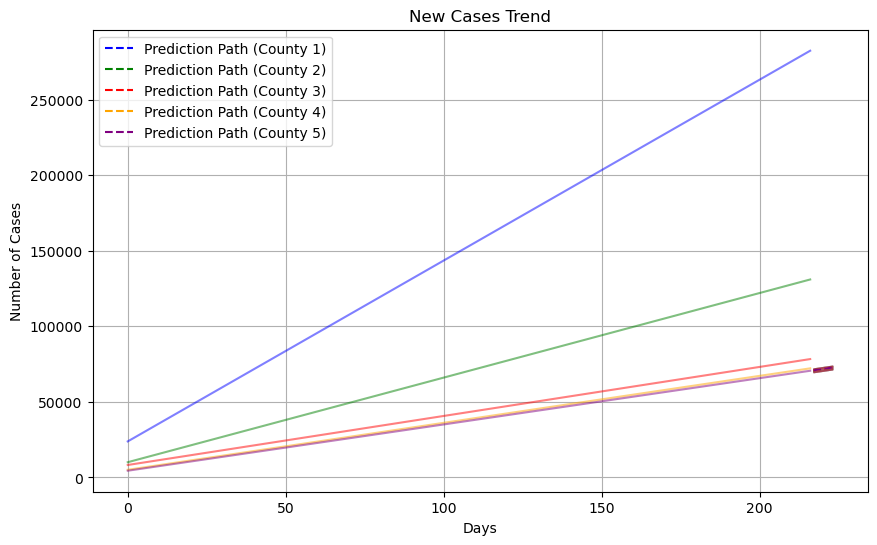

In [308]:
# Step 1: Filter the DataFrame
filtered_df = top_5_county_cases.loc[:, '2020-06-01':'2021-01-03']

# Step 2: Calculate the trend line
X = np.array(range(len(filtered_df.columns))).reshape(-1, 1)
trend_lines = []
for index, row in filtered_df.iterrows():
    y = np.array(row.values).reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    trend_lines.append(model.predict(X))

# Step 3: Forecast 1 week ahead
X_forecast = np.array(range(len(filtered_df.columns), len(filtered_df.columns) + 7)).reshape(-1, 1)
forecasted_data = []
for trend_line in trend_lines:
    forecast = model.predict(X_forecast)
    forecasted_data.append(forecast)

# Step 4: Compute confidence intervals
confidence_intervals = []
for forecast in forecasted_data:
    confidence = 1.96 * np.std(forecast)  # 95% confidence interval
    confidence_intervals.append(confidence)

# Step 5: Plot the figures
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Define colors for each county
for i in range(len(filtered_df)):
    plt.plot(X.ravel(), trend_lines[i], linestyle='-', color=colors[i], alpha=0.5)
    plt.plot(X_forecast.ravel(), forecasted_data[i], linestyle='--', color=colors[i], label=f'Prediction Path (County {i+1})')
    plt.fill_between(X_forecast.ravel(), (forecasted_data[i] - confidence_intervals[i]).ravel(), 
                     (forecasted_data[i] + confidence_intervals[i]).ravel(), color=colors[i], alpha=0.3)

plt.title('New Cases Trend')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

county 1 = Miami-Dade County , county 2 = Broward County , county 3 = Palm Beach, county 4 = Hillsborough County,  county 5 = orange county		